<a href="https://colab.research.google.com/github/leticiacastillon/appliedbioinformatics2020/blob/master/HMM_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For this homework, your task is to build an HMM model for annotating S. cerevisiae.
Please read through the instructions before you start, to best plan your work.

The work is split up in:

1. getting baseline results with the HMM-based tool [Augustus](http://bioinf.uni-greifswald.de/augustus/) 
2. reading a little reference material on HMM gene prediction
3. building and training your HMM
4. comparing with the baseline

Parts 1 can be done after 2 and 3, though it's perhaps best to have the results ready
and to look over them a bit.
For the last 2 points, helper Python code is provided to make the job easier.

## 1. Baseline Results

**Note** This step can take some time (~30 min if the server isn't under heavy load).

For this part, you will need to run Augustus on the server, where it's already installed.

Grab a copy of the *S. cerevisiae* reference genome (from either the HMM or UNIX exercises).
Then run Augustus as below (adjust if you've named your directories differently)

```bash
augustus data/S288C_reference_sequence_R64-2-1_20150113.fsa \
	--species=saccharomyces_cerevisiae_S288C \
	--progress=True > results/ref_annot_augustus.gff
```

The output will be a [GFF](https://www.ensembl.org/info/website/upload/gff3.html) file.
It looks like this:

```
# Predicted genes for sequence number 1 on both strands
# start gene g1
ref|NC_001133|  AUGUSTUS        gene    1807    2169    1       -       .       g1
ref|NC_001133|  AUGUSTUS        transcript      1807    2169    1       -       .       g1.t1
ref|NC_001133|  AUGUSTUS        stop_codon      1807    1809    .       -       0       transcript_id "g1.t1"; gene_id "g1";
ref|NC_001133|  AUGUSTUS        CDS     1810    2169    1       -       0       transcript_id "g1.t1"; gene_id "g1";
ref|NC_001133|  AUGUSTUS        start_codon     2167    2169    .       -       0       transcript_id "g1.t1"; gene_id "g1";
# protein sequence = [MVKLTSIAAGVAAIAATASATTTLAQSDERVNLVELGVYVSDIRAHLAQYYMFQAAHPTETYPVEVAEAVFNYGDFTT
# MLTGIAPDQVTRMITGVPWYSSRLKPAISSALSKDGIYTIAN]
# end gene g1
```

Augustus basically lists all found genes one after the other, with the various sections marked.
It also gives the protein sequence as a comment.
Columns to note are:

1. seqID = chromosome ID
3. type of feature
4. start position of feature
5. end pos. of feat.

Extract the protein sequences into a FASTA file. This will be used to search your results against.

```bash
getAnnoFasta.pl results/ref_annot_augustus.gff
```

This will create a file called `results/ref_annot_augustus.aa`

## 2. Literature

Read at least the 2 references below (a few pages), to recap the concepts and to get maybe get a model as your starting point.

Please very **briefly describe your chosen model**. Why did you or the authors chose the sates you did? Did the authors mention why they chose the probabilities they did? If you created your own model, how did you decide the probabilities?

References:

* Quick recap of gene annotation with HMMs, along with a simple example model 
  [What is a hidden Markov model?](https://www.nature.com/articles/nbt1004-1315)

* Some lecture slides from the University of Waterloo (pages 1-14 cover models like we've discussed). 
  You could use the model on page 9 as a starting point
  https://www.math.uwaterloo.ca/~aghodsib/courses/w05stat440/w05stat440-notes/feb27.pdf

* Yet another article describing a number of HMM classes for sequence analysis
  The model in 2.2. (Fig. 1) could also be a starting point
  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2766791/


## 3. Build and train your model

The simple 2-state model from the lecture is provided for you as an example how to work with this Python package. Your task is to construct a more complex / realistic model based on either the literature review in 2 (or Google) or your own ideas.

You can use whatever model you like as a starting point and make it as complex as you wish.
Remember however that at the end, you're supposed to distinguish genes, so interpreting just
a binary coding / non-coding annotation is tricky.

Keep in mind that the training algorithms only converge to a local optimum and
that the convergence criteria can be tweaked. 
Starting with different random seeds will also produce different results.

The S. cerevisiae reference has 17 chromosomes. 
Ideally, you should **train on all of them**, but depending on the model complexity and parameters,
this might take a lot of time. It's up to you how and what to compromise on.
The important thing is that you implement the entire procedure for your model.

You can save trained models: https://hmmlearn.readthedocs.io/en/latest/tutorial.html#saving-and-loading-hmm
And in Google Colab you can connect ("mount") your Drive to the notebook environment,
then you can save to it (the folder called "drive/").
Otherwise **all files disappear** from the notebook environment once you disconnect.


## 4. Compare you results with the baseline

To test, it's **sufficient to annotate chromosome 1**

You'll primarily be concerned with the length distribution of the proteins coded by the genes you identify with your model. It should be similar to the distribution of Augustust results (and real gene data).

The **last step** involves blasting the protein sequences of your genes against a reference, provided you've found long enough proteins to search for. In that sense, this last part is **optional** since the important thing for you is to build a working model, regarldess how well you do against state-of-the-art software :)  For this, you can either use the Augustus FASTA created as baseline or a yeas proteome fetched from https://www.uniprot.org/ . See the last step here on how to blast sequences: https://mpbio-bbt015.github.io/gene-prediction-exercise.html


**Note** that the function provided for you to extract gene positions requires
a regular expression (pattern) that describes what a gene looks like given the hidden states
you chose. If you have trouble adjusting it for your model, get in touch with us since regexes were
not covered in the course. 
If you want to experiment, https://regex101.com/ is a great size that tests and analyzes regexes






# Setup

This setup section needs to be run every time you connect to this notebook, as the environment it runs in is volatile (no software you install or files you create will be saved, unless you transfer the latter to your Drive)

Install packages:

* [hmmlearn](https://hmmlearn.readthedocs.io/en/latest/index.html) 
* [Biopython](https://biopython.org/) - for working with bio sequences
* gffutils - for parsing GFF files

In [1]:
%%bash

pip install hmmlearn
pip install biopython
pip install gffutils

  Created wheel for gffutils: filename=gffutils-0.10.1-cp36-none-any.whl size=1608578 sha256=b16e31092746e41b485dbefad7f6a43bb472b3ee3c0e142668621fe3dd09067d
  Stored in directory: /root/.cache/pip/wheels/52/c8/8c/5b5edef863b51b00f822fd7783608ea7a09b4ab75b87226479
  Created wheel for pyfaidx: filename=pyfaidx-0.5.8-cp36-none-any.whl size=25051 sha256=2fe67f58aef3615be4f8898443368276d9acf562c4845ede269c3b158d9ca9bc
  Stored in directory: /root/.cache/pip/wheels/58/ea/ee/59d4649b0fb82a0690bdeae834bc85891b306126bcc067e29f
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114202 sha256=2431c08c5c6db4ab8aa0b0c0bac79e3703512e4e0e975823ef88f4ffdfd69cc1
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built gffutils pyfaidx simplejson


Download *S. cerevisiae* reference genome and put it in a directory called `data`

In [3]:
%%bash

wget --quiet https://downloads.yeastgenome.org/sequence/S288C_reference/genome_releases/S288C_reference_genome_Current_Release.tgz
tar -xzvf S288C_reference_genome_Current_Release.tgz
mv S288C_reference_genome_R64-2-1_20150113 data
rm S288C_reference_genome_Current_Release.tgz

S288C_reference_genome_R64-2-1_20150113/
S288C_reference_genome_R64-2-1_20150113/rna_coding_R64-2-1_20150113.fasta
S288C_reference_genome_R64-2-1_20150113/NotFeature_R64-2-1_20150113.fasta
S288C_reference_genome_R64-2-1_20150113/orf_coding_all_R64-2-1_20150113.fasta
S288C_reference_genome_R64-2-1_20150113/other_features_genomic_R64-2-1_20150113.fasta
S288C_reference_genome_R64-2-1_20150113/S288C_reference_sequence_R64-2-1_20150113.fsa
S288C_reference_genome_R64-2-1_20150113/gene_association_R64-2-1_20150113.sgd
S288C_reference_genome_R64-2-1_20150113/orf_trans_all_R64-2-1_20150113.fasta
S288C_reference_genome_R64-2-1_20150113/saccharomyces_cerevisiae_R64-2-1_20150113.gff


## Import packages and define some helper functions

hmmlearn is popular and has good performance but it's slighly trickier to work with. It doesn't use labels for states or emissions, just their index in the model (e.g. emission 0, 1, 2.. regardless of labels A, T, C G). Below are 2 functions to translate back and forth from numbers to symbols.

To extract genes from an annotation sequence (e.g. NNNCCCNNN), the approach here
is to extract patterns assumed to be genes from the full annotation using regular expressions . A function for that is provided.


In [0]:
# Python built-ins
import re
import time
import pickle

# Installed packages
import numpy as np
from hmmlearn import hmm
from Bio import SeqIO


def translate_symbol_sequence_to_numbers(symbol_sequence: str, symbol_alphabet: list) -> list:
    """
    Translate emission symbols to numbers so that the HMM model can work with them
    """
    translation_table = {symbol_alphabet[i]: i 
                         for i in range(len(symbol_alphabet))}
    return [translation_table[symbol] for symbol in symbol_sequence]


def translate_numbers_to_symbol_sequence(number_sequence: list, symbol_alphabet: list) -> str:
    """
    Translate HMM hidden state numbers into symbols
    """
    symbols = [symbol_alphabet[x] for x in number_sequence]
    return ''.join(symbols)


def get_gene_start_and_stop_from_annotation(annotation: str, gene_pattern: str) -> list:
    """
    Return a list of (start_pos, end_pos) pairs for found genes.

    Needs a regular expression (gene_pattern) that describes what a gene looks like
    in terms of hidden states.
    
    Example:   
        gene_pattern = 'C+'   # a sequence which consists of at least one C
        annotation = 'NNCCNCCN'
        
        returns [(2, 4), (5, 7)]
    """
    gene_positions = []
    for match in re.finditer(gene_pattern, annotation):
        gene_positions.append(match.span())
    return gene_positions


# Example: The basic (2-state) model

The `hmmlearn` package provides a few HMM model classes. The one matching the basic kind we've covered is the `MultinomialHMM`.

Below is the same basic model we've seen in the lecture and exercise, provided to show how to use the package.

Skim through the short hmmlearn [tutorial](
https://hmmlearn.readthedocs.io/en/latest/tutorial.html) to fix some concepts if the code/comments below are confusing.



In [0]:
hidden_states = ['C', 'N']               # Called "components" in this package
emission_labels = ['A', 'T', 'C', 'G']   # Called "fatures"

# Maximum n. iterations performed during training.
# The training will stop at this regardless of how close it is to convergence (i.e. best fit to data)
# Increasing will increase chances of a better fit but will of course take longer
MAX_N_BAUM_WELCH_ITERATIONS = 10

# Create model object
basic_model = hmm.MultinomialHMM(n_components = len(hidden_states),
                                 n_iter = MAX_N_BAUM_WELCH_ITERATIONS)

# Adjust its parameters
basic_model.n_features = len(emission_labels)

# Order of elements must match those in the component and features lists above
basic_model.startprob_ = np.array([0.3, 0.7])
basic_model.transmat_ = np.array([[0.995, 0.005],
                                  [0.01,  0.99]])

# The matrix is expected to be of shape (rows=states x cols=emissions)
# Here it's transposed from the form used in lecture slides
basic_model.emissionprob_ = np.array([[0.3, 0.1],
                                      [0.3, 0.1],
                                      [0.2, 0.4],
                                      [0.2, 0.4]]).T

# Preview
basic_model

MultinomialHMM(algorithm='viterbi', init_params='ste', n_components=2,
               n_iter=10, params='ste', random_state=None, startprob_prior=1.0,
               tol=0.01, transmat_prior=1.0, verbose=False)

Load reference genome (full chromosome sequences):

In [0]:
ref_chromosomes = list(SeqIO.parse('data/S288C_reference_sequence_R64-2-1_20150113.fsa', 'fasta'))

## Prepare training data

`hmmlearn` wants training sequences to be columns in a matrix. So here we structure the chromosome sequences that way, also converting from symbolic to numeric representation. 

For more details: https://hmmlearn.readthedocs.io/en/latest/tutorial.html#multiple-sequences

In [0]:
# Include k chromosomes in training data
training_chromosome_idx = [0, 1]

trainig_data = np.concatenate(
    [np.array(
        translate_symbol_sequence_to_numbers(ref_chromosomes[k].seq, emission_labels)
        ).reshape(-1, 1)  # makes it a column vector
     for k in training_chromosome_idx]
)

trainig_lengths = [len(ref_chromosomes[k].seq) for k in training_chromosome_idx]

# Test on chromosome 1
test_data = np.array(
    [translate_symbol_sequence_to_numbers(ref_chromosomes[0].seq, emission_labels)]
).T

The ubiquitous [NumPy](https://numpy.org/devdocs/user/quickstart.html) package is used to work with matrices and vectors. It was created as an imitation of Matlab so some thing should be familiar. But if you want to change the code and you get stuck, let us know! 

## Train model 

The `.fit()` function is used as below. We fix the random seed to get the same results between runs. This can be changed to see how the algorithm converges differently based on initialization.

For more details: https://hmmlearn.readthedocs.io/en/latest/api.html#hmmlearn.base._BaseHMM.fit

In [0]:
t0 = time.time()    # this is just to measure execution time (nothing to do with hmmlearn)
np.random.seed(42)  # Make this randomized procedure deterministic (reproducible)

basic_model.fit(trainig_data, trainig_lengths)

print(f'Training took {time.time() - t0} seconds')

Training took 49.746464252471924 seconds


## Annotate chromosome

Use the trained model to annotate our test chromosome with C or N (coding or non-coding nucleobase). The `.predict()` function is used.

In [0]:
annotation_numeric = basic_model.predict(test_data)  # numbers == hidden state number
annotation = translate_numbers_to_symbol_sequence(annotation_numeric, hidden_states)

# Preview first 100 annotated bases
annotation[0:500]

'CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCNNCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCNCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCCNCCCCNCCCCCCCCCNCCCNCCCCCCCCCCCCCCNCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCCNCCCCCCNCCCCCCCNCCCNCCCCCNNCCNCCCCCNCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCNCCCCCCCCCCCCCCCCCNNCCCCC'

Now let's **extract genes**

In our very simple model, we know "genes" are stretches of coding bases (obviously wrong because a bunch of coding groups of bases like CCCNNCCC could be exons in the same gene).

So we get the start and end positions (indices) for all such patterns of multiple 'C's.

In [0]:
gene_positions = get_gene_start_and_stop_from_annotation(annotation, 
                                                         gene_pattern = 'C+')

# Preview gene positions
gene_positions[0:4]

[(0, 83), (84, 99), (101, 108), (109, 135)]

**Question** Do these positions resemble the Augustus results?

**Not really** ! This model is simplistic and the training consistsed of only a few iterations over only 2 chromosomes.

## Inspect results

### Transcribe and translate found genes to protein sequences

Let's see if we were able to recover protein-coding genes!
We'll use the Biopython sequence manipulation functionality.

Remember we're working with chromosome 1  (indexed with 0 in our collection since Python lists are 0-indexed).

Biopython will warn you when it's given a sequence that can't be propely translated.

In [52]:
def translate_genes(gene_positions: list, dna_sequence) -> list:
    aa_sequences = []
    for gene_pos in gene_positions:
        aa = dna_sequence[gene_pos[0] : gene_pos[1]].transcribe().translate()
        aa_sequences.append(aa)
    return aa_sequences

aa_sequences = translate_genes(gene_positions, ref_chromosomes[0].seq)

# Preview
aa_sequences[0]

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('PHHTHTPTHHTTHHTTPTHTHPNTTLTQP*SNPGQPVSQLTLHYPASTRYPVPF...*HT', HasStopCodon(ExtendedIUPACProtein(), '*'))

### Look at the protein length distribution

(FYI: We're sneaking in the `pandas` package (already installed in Colab), which has become the standard Python package for data analysis.
It's very similar to R's `tidyverse` and `data.table`. But here it's just used for convenient plotting)

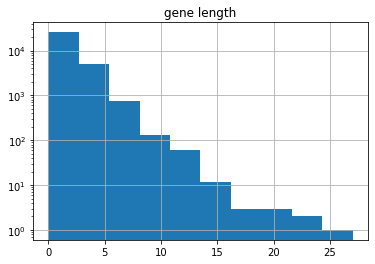

In [0]:
def plot_protein_length_distribution(aa_sequences: list):
    import pandas as pd
    pd.DataFrame({'gene length': map(lambda s: len(s), aa_sequences)}).hist(log=True)

plot_protein_length_distribution(aa_sequences)

### Compare with baseline

Load the protein FASTA exported by Augusts (in **Task 1**) and plot the protein length distribution.

You can use the function below to read the fasta once you upload it to Drive.

In [0]:
def read_protein_sequences_from_fasta(fasta_filename: str) -> list:
     return list(SeqIO.parse(fasta_filename, 'fasta'))

#### Optional: Save to FASTA and blastp

We can save the protein sequences to a FASTA file, download it, upload it to the server and blast it against the Augustus FASTA file.
For blasting, see the last part here: https://mpbio-bbt015.github.io/gene-prediction-exercise.html

In [0]:
def save_sequences_as_fasta(sequences: list, fasta_filename: str):
    fasta_entries = []
    for i in range(len(sequences)):
        if len(sequences[i]) > 20:   # shortest known protein in any organism
            fasta_entries.append(f'>gene{i}\n{sequences[i]}\n')
    with open(fasta_filename, 'w') as output_fasta:
        output_fasta.writelines(fasta_entries)
    print(f'INFO: Wrote {len(fasta_entries)} protein sequences')

save_sequences_as_fasta(aa_sequences, 'hits.fasta')

INFO: Wrote 4 protein sequences


```







```

## Assignment: Build a better HMM

Your turn! Create a better HMM using the example and code provided and try your best to get better results. 

How well can you do against Augustus? :)  (the important thing is to build + use the model so don't worry about matching it - just aim to improve results)

Remember:

* very briefly describe your model
* try to train on all chromosomes (adjust the code)
* try to tweak training paramenters (like max n. iterations) to get a better fit to training data
* try different random seeds
* perhaps try different training algorithms? hmmlearn provides an alternative to Viterbi.
* You can **save trained models to a file**! Very usedul if you've spend a lot of time training. (Colab clears everything when it disconnects). See here https://hmmlearn.readthedocs.io/en/latest/tutorial.html#saving-and-loading-hmm


**Have fun!**


![xkcd](https://imgs.xkcd.com/comics/machine_learning.png)

#########TRYING TO IMPROVE THE MODEL##############


In [39]:
 #Trying to build a better HMM model
 hidden_states = ['I', 'E', 'Ig']               # Called "components" in this package
emission_labels = ['A', 'T', 'C', 'G']   # Called "fatures"

# Maximum n. iterations performed during training.
# The training will stop at this regardless of how close it is to convergence (i.e. best fit to data)
# Increasing will increase chances of a better fit but will of course take longer
MAX_N_BAUM_WELCH_ITERATIONS = 80

# Create model object
basic_model = hmm.MultinomialHMM(n_components = len(hidden_states),
                                 n_iter = MAX_N_BAUM_WELCH_ITERATIONS,
                                 init_params = "")

# Adjust its parameters
basic_model.n_features = len(emission_labels)

# Order of elements must match those in the component and features lists above
basic_model.startprob_ = np.array([0.2, 0.3, 0.5])
basic_model.transmat_ = np.array([[0.99, 0.01, 0],
                                  [0.007,  0.99, 0.003],
                                  [0, 0.001, 0.999]])

# The matrix is expected to be of shape (rows=states x cols=emissions)
# Here it's transposed from the form used in lecture slides
basic_model.emissionprob_ = np.array([[0.26, 0.24, 0.27],
                                      [0.3, 0.21, 0.27],
                                      [0.22, 0.27, 0.23],
                                      [0.22, 0.28, 0.22]]).T

# Preview
basic_model

MultinomialHMM(algorithm='viterbi', init_params='', n_components=3, n_iter=80,
               params='ste', random_state=None, startprob_prior=1.0, tol=0.01,
               transmat_prior=1.0, verbose=False)

I chose the emission probabilities from the lecture from the University of Waterloo. The starting probabilities aim to reflect that it is more likely to start in a non coding region since non-coding regions are very abundant in eukaryotic genomes. The probability should be a big higher than 0.5, but I wanted to use this as a starting point. I also tried to add a bit more of complexity by using introns and exons, and I gave them a similar probability, although slightly higher for exons because I think it is more likely that a gene starts with an exon than an intron. 

In [0]:
#Preparation of training data
# Include k chromosomes in training data
training_chromosome_idx = [0, 1, 2, 3]

trainig_data = np.concatenate(
    [np.array(
        translate_symbol_sequence_to_numbers(ref_chromosomes[k].seq, emission_labels)
        ).reshape(-1, 1)  # makes it a column vector
     for k in training_chromosome_idx]
)

trainig_lengths = [len(ref_chromosomes[k].seq) for k in training_chromosome_idx]

# Test on chromosome 1
test_data = np.array(
    [translate_symbol_sequence_to_numbers(ref_chromosomes[0].seq, emission_labels)]
).T

In [41]:
#Training
t0 = time.time()    # this is just to measure execution time (nothing to do with hmmlearn)
np.random.seed(84)  # Make this randomized procedure deterministic (reproducible)

basic_model.fit(trainig_data, trainig_lengths)

print(f'Training took {time.time() - t0} seconds')

Training took 1434.3676676750183 seconds


In [42]:
#Annotation
annotation_numeric = basic_model.predict(test_data)  # numbers == hidden state number
annotation = translate_numbers_to_symbol_sequence(annotation_numeric, hidden_states)

# Preview first 100 annotated bases
annotation[0:1000]

'EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIEEEIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIgIg

In [43]:
gene_positions = get_gene_start_and_stop_from_annotation(annotation, 
                                                         gene_pattern = 'E+I+')

# Preview gene positions
gene_positions[0:4]

[(0, 636), (636, 640), (25085, 25359), (47106, 47525)]

In [44]:
def translate_genes(gene_positions: list, dna_sequence) -> list:
    aa_sequences = []
    for gene_pos in gene_positions:
        aa = dna_sequence[gene_pos[0] : gene_pos[1]].transcribe().translate()
        aa_sequences.append(aa)
    return aa_sequences

aa_sequences = translate_genes(gene_positions, ref_chromosomes[0].seq)

# Preview
aa_sequences[0]

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('PHHTHTPTHHTTHHTTPTHTHPNTTLTQP*SNPGQPVSQLTLHYPASTRYPVPF...GGP', HasStopCodon(ExtendedIUPACProtein(), '*'))

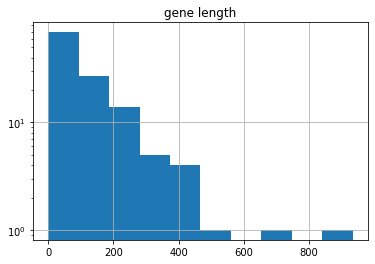

In [45]:
def plot_protein_length_distribution(aa_sequences: list):
    import pandas as pd
    pd.DataFrame({'gene length': map(lambda s: len(s), aa_sequences)}).hist(log=True)

plot_protein_length_distribution(aa_sequences)


With 3 chromosomes, 84 random seeds and 50 iterations the results look quite similar than with 42 iterations and/or 2 chromosomes, but the gene legth distribution does change. We get a range from 0-1000 which seems a bit more realistic than what we had before (0-25), although still considerably shorter than what is expected for a S. cerevisiae gene, which is on average 1.6 kb long (https://bionumbers.hms.harvard.edu/bionumber.aspx?id=101458&ver=1). Also, most sequences are below 200 so the distribution is still skewed towards very short fragments. 

Training took 1864.0024154186249 seconds


/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


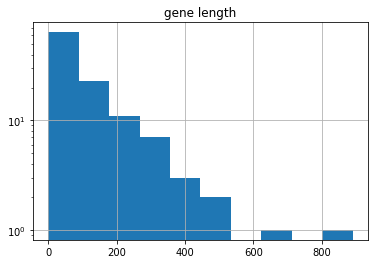

In [49]:
 #Trying to build a better HMM model
 hidden_states = ['I', 'E', 'Ig']               # Called "components" in this package
emission_labels = ['A', 'T', 'C', 'G']   # Called "fatures"

# Maximum n. iterations performed during training.
# The training will stop at this regardless of how close it is to convergence (i.e. best fit to data)
# Increasing will increase chances of a better fit but will of course take longer
MAX_N_BAUM_WELCH_ITERATIONS = 80

# Create model object
basic_model = hmm.MultinomialHMM(n_components = len(hidden_states),
                                 n_iter = MAX_N_BAUM_WELCH_ITERATIONS,
                                 init_params = "")

# Adjust its parameters
basic_model.n_features = len(emission_labels)

# Order of elements must match those in the component and features lists above
basic_model.startprob_ = np.array([0.2, 0.3, 0.5])
basic_model.transmat_ = np.array([[0.99, 0.01, 0],
                                  [0.007,  0.99, 0.003],
                                  [0, 0.001, 0.999]])

# The matrix is expected to be of shape (rows=states x cols=emissions)
# Here it's transposed from the form used in lecture slides
basic_model.emissionprob_ = np.array([[0.26, 0.24, 0.27],
                                      [0.3, 0.21, 0.27],
                                      [0.22, 0.27, 0.23],
                                      [0.22, 0.28, 0.22]]).T

# Preview
basic_model
#Preparation of training data
# Include k chromosomes in training data
training_chromosome_idx = [0, 1, 2, 3, 4, 5]

trainig_data = np.concatenate(
    [np.array(
        translate_symbol_sequence_to_numbers(ref_chromosomes[k].seq, emission_labels)
        ).reshape(-1, 1)  # makes it a column vector
     for k in training_chromosome_idx]
)

trainig_lengths = [len(ref_chromosomes[k].seq) for k in training_chromosome_idx]

# Test on chromosome 1
test_data = np.array(
    [translate_symbol_sequence_to_numbers(ref_chromosomes[0].seq, emission_labels)]
).T
#Training
t0 = time.time()    # this is just to measure execution time (nothing to do with hmmlearn)
np.random.seed(84)  # Make this randomized procedure deterministic (reproducible)

basic_model.fit(trainig_data, trainig_lengths)

print(f'Training took {time.time() - t0} seconds')
#Annotation
annotation_numeric = basic_model.predict(test_data)  # numbers == hidden state number
annotation = translate_numbers_to_symbol_sequence(annotation_numeric, hidden_states)

# Preview first 100 annotated bases
annotation[0:1000]

gene_positions = get_gene_start_and_stop_from_annotation(annotation, 
                                                         gene_pattern = 'E+I+')

# Preview gene positions
gene_positions[0:4]

def translate_genes(gene_positions: list, dna_sequence) -> list:
    aa_sequences = []
    for gene_pos in gene_positions:
        aa = dna_sequence[gene_pos[0] : gene_pos[1]].transcribe().translate()
        aa_sequences.append(aa)
    return aa_sequences

aa_sequences = translate_genes(gene_positions, ref_chromosomes[0].seq)

# Preview
aa_sequences[0]

def plot_protein_length_distribution(aa_sequences: list):
    import pandas as pd
    pd.DataFrame({'gene length': map(lambda s: len(s), aa_sequences)}).hist(log=True)

plot_protein_length_distribution(aa_sequences)

Here I tried to retrain the model including a larger number of chromosomes but it did not seem to improve. It may be that including an even larger number of chromosomes would be helpful, but due to lack of time I did not. 

Training took 2316.914821624756 seconds


/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


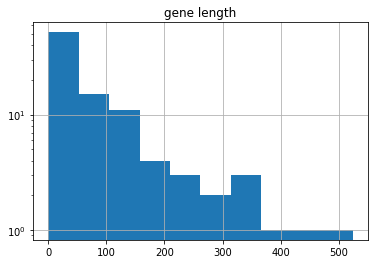

In [50]:
 #Trying to build a better HMM model
 hidden_states = ['I', 'E', 'Ig']               # Called "components" in this package
emission_labels = ['A', 'T', 'C', 'G']   # Called "fatures"

# Maximum n. iterations performed during training.
# The training will stop at this regardless of how close it is to convergence (i.e. best fit to data)
# Increasing will increase chances of a better fit but will of course take longer
MAX_N_BAUM_WELCH_ITERATIONS = 100

# Create model object
basic_model = hmm.MultinomialHMM(n_components = len(hidden_states),
                                 n_iter = MAX_N_BAUM_WELCH_ITERATIONS,
                                 init_params = "")

# Adjust its parameters
basic_model.n_features = len(emission_labels)

# Order of elements must match those in the component and features lists above
basic_model.startprob_ = np.array([0.2, 0.3, 0.5])
basic_model.transmat_ = np.array([[0.99, 0.01, 0],
                                  [0.007,  0.99, 0.003],
                                  [0, 0.001, 0.999]])

# The matrix is expected to be of shape (rows=states x cols=emissions)
# Here it's transposed from the form used in lecture slides
basic_model.emissionprob_ = np.array([[0.26, 0.24, 0.27],
                                      [0.3, 0.21, 0.27],
                                      [0.22, 0.27, 0.23],
                                      [0.22, 0.28, 0.22]]).T

# Preview
basic_model
#Preparation of training data
# Include k chromosomes in training data
training_chromosome_idx = [0, 1, 2, 3, 4, 5]

trainig_data = np.concatenate(
    [np.array(
        translate_symbol_sequence_to_numbers(ref_chromosomes[k].seq, emission_labels)
        ).reshape(-1, 1)  # makes it a column vector
     for k in training_chromosome_idx]
)

trainig_lengths = [len(ref_chromosomes[k].seq) for k in training_chromosome_idx]

# Test on chromosome 1
test_data = np.array(
    [translate_symbol_sequence_to_numbers(ref_chromosomes[0].seq, emission_labels)]
).T
#Training
t0 = time.time()    # this is just to measure execution time (nothing to do with hmmlearn)
np.random.seed(84)  # Make this randomized procedure deterministic (reproducible)

basic_model.fit(trainig_data, trainig_lengths)

print(f'Training took {time.time() - t0} seconds')
#Annotation
annotation_numeric = basic_model.predict(test_data)  # numbers == hidden state number
annotation = translate_numbers_to_symbol_sequence(annotation_numeric, hidden_states)

# Preview first 100 annotated bases
annotation[0:1000]

gene_positions = get_gene_start_and_stop_from_annotation(annotation, 
                                                         gene_pattern = 'E+I+')

# Preview gene positions
gene_positions[0:4]

def translate_genes(gene_positions: list, dna_sequence) -> list:
    aa_sequences = []
    for gene_pos in gene_positions:
        aa = dna_sequence[gene_pos[0] : gene_pos[1]].transcribe().translate()
        aa_sequences.append(aa)
    return aa_sequences

aa_sequences = translate_genes(gene_positions, ref_chromosomes[0].seq)

# Preview
aa_sequences[0]

def plot_protein_length_distribution(aa_sequences: list):
    import pandas as pd
    pd.DataFrame({'gene length': map(lambda s: len(s), aa_sequences)}).hist(log=True)

plot_protein_length_distribution(aa_sequences)

I increased the number of iterations once more to see if it would make a difference even though by training on the number of chromosomes seemed to lead to a plateau. It seemed to average most genes to a shorter length than the previous model and has more genes above 200 bp but the longest gene is shorter than before (500 bp compared to 800 bp) so we do not get closer to the expected length. However, this is not very surprising because of the way that the model is looking for gene patterns, considering a gene as a string of "exon" and "intron", whereas a real gene can consist of several exons and introns. Therefore we are obviously splitting most genes and it is hard to get genes of the expected size that consist of only one gene and intron. However, since this model does have a more equal distribution and more "longer" genes, I would say the larger number of iterations still improved the model.
 

Training took 2306.622861623764 seconds


/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


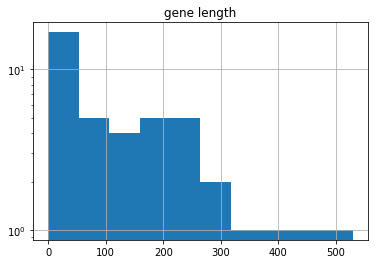

In [51]:
 #Trying to build a better HMM model
 hidden_states = ['I', 'E', 'Ig']               # Called "components" in this package
emission_labels = ['A', 'T', 'C', 'G']   # Called "fatures"

# Maximum n. iterations performed during training.
# The training will stop at this regardless of how close it is to convergence (i.e. best fit to data)
# Increasing will increase chances of a better fit but will of course take longer
MAX_N_BAUM_WELCH_ITERATIONS = 100

# Create model object
basic_model = hmm.MultinomialHMM(n_components = len(hidden_states),
                                 n_iter = MAX_N_BAUM_WELCH_ITERATIONS,
                                 init_params = "")

# Adjust its parameters
basic_model.n_features = len(emission_labels)

# Order of elements must match those in the component and features lists above
basic_model.startprob_ = np.array([0.2, 0.3, 0.5])
basic_model.transmat_ = np.array([[0.99, 0.01, 0],
                                  [0.007,  0.99, 0.003],
                                  [0, 0.001, 0.999]])

# The matrix is expected to be of shape (rows=states x cols=emissions)
# Here it's transposed from the form used in lecture slides
basic_model.emissionprob_ = np.array([[0.26, 0.24, 0.27],
                                      [0.3, 0.21, 0.27],
                                      [0.22, 0.27, 0.23],
                                      [0.22, 0.28, 0.22]]).T

# Preview
basic_model
#Preparation of training data
# Include k chromosomes in training data
training_chromosome_idx = [0, 1, 2, 3, 4, 5]

trainig_data = np.concatenate(
    [np.array(
        translate_symbol_sequence_to_numbers(ref_chromosomes[k].seq, emission_labels)
        ).reshape(-1, 1)  # makes it a column vector
     for k in training_chromosome_idx]
)

trainig_lengths = [len(ref_chromosomes[k].seq) for k in training_chromosome_idx]

# Test on chromosome 1
test_data = np.array(
    [translate_symbol_sequence_to_numbers(ref_chromosomes[0].seq, emission_labels)]
).T
#Training
t0 = time.time()    # this is just to measure execution time (nothing to do with hmmlearn)
np.random.seed(84)  # Make this randomized procedure deterministic (reproducible)

basic_model.fit(trainig_data, trainig_lengths)

print(f'Training took {time.time() - t0} seconds')
#Annotation
annotation_numeric = basic_model.predict(test_data)  # numbers == hidden state number
annotation = translate_numbers_to_symbol_sequence(annotation_numeric, hidden_states)

# Preview first 100 annotated bases
annotation[0:1000]

gene_positions = get_gene_start_and_stop_from_annotation(annotation, 
                                                         gene_pattern = 'E+I+E+')

# Preview gene positions
gene_positions[0:4]

def translate_genes(gene_positions: list, dna_sequence) -> list:
    aa_sequences = []
    for gene_pos in gene_positions:
        aa = dna_sequence[gene_pos[0] : gene_pos[1]].transcribe().translate()
        aa_sequences.append(aa)
    return aa_sequences

aa_sequences = translate_genes(gene_positions, ref_chromosomes[0].seq)

# Preview
aa_sequences[0]

def plot_protein_length_distribution(aa_sequences: list):
    import pandas as pd
    pd.DataFrame({'gene length': map(lambda s: len(s), aa_sequences)}).hist(log=True)

plot_protein_length_distribution(aa_sequences)

So as we see the distribution considerably changes when you change the gene patter that it should find. In this case it finds less genes than before.

In [0]:
def read_protein_sequences_from_fasta(fasta_filename: str) -> list:
     return list(SeqIO.parse(fasta_filename, 'fasta'))

In [0]:
augustus_seq = read_protein_sequences_from_fasta('data/ref_annot_augustus.aa')

In [25]:
def save_sequences_as_fasta(sequences: list, fasta_filename: str):
    fasta_entries = []
    for i in range(len(sequences)):
        if len(sequences[i]) > 20:   # shortest known protein in any organism
            fasta_entries.append(f'>gene{i}\n{sequences[i]}\n')
    with open(fasta_filename, 'w') as output_fasta:
        output_fasta.writelines(fasta_entries)
    print(f'INFO: Wrote {len(fasta_entries)} protein sequences')

save_sequences_as_fasta(aa_sequences, 'hits.fasta')

INFO: Wrote 73 protein sequences


Results from augusts ploted: 

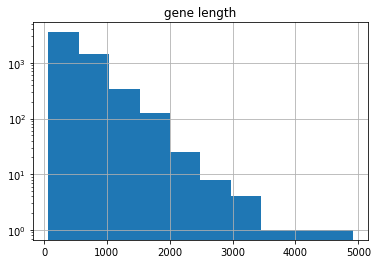

In [29]:
plot_protein_length_distribution(augustus_seq)

The plot of the results from Augustus shows a more realistic distribution of gene lenghts, considering that the average gene size in S. cerevisiae is 1.6 kb. Therefore, although my new model has a slightly better output than the first one, it is still quite far from Augustus output. It may be that it needs more training data (i.e. it may improve with training over more chromosomes) or simply that the data needs further processing before training the model. It may also be that different parameters are needed for different parts of the genome: i.e. different likelihoods of introns, exons and non-coding regions on different segments of the genome. Therefore, it could help to train on different HMM models with slightly different parameters and see if there is a better one for different parts of the genome. 

This could also be applied to the different "structures" of the genes: different sequences of exons and introns.